In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Full sales data.csv",encoding='latin1')

In [3]:
data

,OrderNumber,OrderDate,Customer_Name_Index,Channel,Warehouse_Code,Delivery_Region_Index,Product_Description_Index,Order_Quantity,Unit_Price,Line_Total,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,_2017_Budgets
0,SO - 0010604,01-01-2014,95,Wholesale,NXH382,1,19,11,5078.600098,55864.60156,...,-85.480782,334,62059,21767,38342,152375113,2646161,America/Chicago,South,1645841.625
1,SO - 0007380,17-03-2014,107,Wholesale,NXH382,1,25,10,1112.199951,11122.00000,...,-85.480782,334,62059,21767,38342,152375113,2646161,America/Chicago,South,5342315.500
2,SO - 0007337,20-03-2014,106,Export,NXH382,1,20,5,1882.699951,9413.50000,...,-85.480782,334,62059,21767,38342,152375113,2646161,America/Chicago,South,2067108.125
3,SO - 0010138,29-03-2014,92,Wholesale,NXH382,1,2,10,1835.800049,18358.00000,...,-85.480782,334,62059,21767,38342,152375113,2646161,America/Chicago,South,3050087.500
4,SO - 0005470,27-04-2014,70,Export,NXH382,1,25,7,234.500000,1641.50000,...,-85.480782,334,62059,21767,38342,152375113,2646161,America/Chicago,South,5342315.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0006706,28-07-2017,84,Export,AXW291,994,14,11,2003.300049,22036.30078,...,-104.820251,307,63335,25130,58219,69964749,282335,America/Denver,West,4028698.500
64100,SO - 0001255,04-10-2017,156,Distributor,GUT930,994,20,8,1889.400024,15115.20020,...,-104.820251,307,63335,25130,58219,69964749,282335,America/Denver,West,2067108.125
64101,SO - 0006578,24-09-2017,102,Wholesale,AXW291,994,25,10,1072.000000,10720.00000,...,-104.820251,307,63335,25130,58219,69964749,282335,America/Denver,West,5342315.500
64102,SO - 0010201,23-09-2017,127,Wholesale,AXW291,994,19,11,2592.899902,28521.90039,...,-104.820251,307,63335,25130,58219,69964749,282335,America/Denver,West,1645841.625


In [4]:
data.isna().sum()

OrderNumber                  0
OrderDate                    0
Customer_Name_Index          0
Channel                      0
Warehouse_Code               0
Delivery_Region_Index        0
Product_Description_Index    0
Order_Quantity               0
Unit_Price                   0
Line_Total                   0
Total_Unit_Cost              0
Customer_Names               0
Index                        0
Product_Name                 0
Region Name                  0
county                       0
state_code                   0
state                        0
type                         0
latitude                     0
longitude                    0
area_code                    0
population                   0
households                   0
median_income                0
land_area                    0
water_area                   0
time_zone                    0
Region                       0
_2017_Budgets                0
dtype: int64

In [5]:
data.dtypes

OrderNumber                   object
OrderDate                     object
Customer_Name_Index            int64
Channel                       object
Warehouse_Code                object
Delivery_Region_Index          int64
Product_Description_Index      int64
Order_Quantity                 int64
Unit_Price                   float64
Line_Total                   float64
Total_Unit_Cost              float64
Customer_Names                object
Index                          int64
Product_Name                  object
Region Name                   object
county                        object
state_code                    object
state                         object
type                          object
latitude                     float64
longitude                    float64
area_code                      int64
population                     int64
households                     int64
median_income                  int64
land_area                      int64
water_area                     int64
t

In [6]:
data['OrderDate']=pd.to_datetime(data['OrderDate'],format='mixed')

In [7]:
# line total is revenue
data=data.rename(columns={'Line_Total':'Revenue','_2017_Budgets':'Budgets'})

In [8]:
#blacking out budget for non 2017 year orders


data.loc[data['OrderDate'].dt.year != 2017,'Budgets']= pd.NA
data[['OrderDate','Product_Name','Revenue','Budgets']].head()

,OrderDate,Product_Name,Revenue,Budgets
0,2014-01-01,Product 19,55864.60156,NaN
1,2014-03-17,Product 25,11122.00000,NaN
2,2014-03-20,Product 20,9413.50000,NaN
3,2014-03-29,Product 2,18358.00000,NaN
4,2014-04-27,Product 25,1641.50000,NaN


# Feature Engineering


In [9]:
data['Total_Cost']=data['Order_Quantity']*data['Total_Unit_Cost']

In [10]:
data['Profit']=data['Revenue'] - data['Total_Cost']

In [11]:
data['Profit_Margin_PCT']=data['Profit']/data['Revenue']*100

In [12]:
data.head()

,OrderNumber,OrderDate,Customer_Name_Index,Channel,Warehouse_Code,Delivery_Region_Index,Product_Description_Index,Order_Quantity,Unit_Price,Revenue,...,households,median_income,land_area,water_area,time_zone,Region,Budgets,Total_Cost,Profit,Profit_Margin_PCT
0,SO - 0010604,2014-01-01,95,Wholesale,NXH382,1,19,11,5078.600098,55864.60156,...,21767,38342,152375113,2646161,America/Chicago,South,NaN,45250.369142,10614.232418,18.999925
1,SO - 0007380,2014-03-17,107,Wholesale,NXH382,1,25,10,1112.199951,11122.00000,...,21767,38342,152375113,2646161,America/Chicago,South,NaN,6005.900269,5116.099731,45.999818
2,SO - 0007337,2014-03-20,106,Export,NXH382,1,20,5,1882.699951,9413.50000,...,21767,38342,152375113,2646161,America/Chicago,South,NaN,5083.299865,4330.200135,45.999895
3,SO - 0010138,2014-03-29,92,Wholesale,NXH382,1,2,10,1835.800049,18358.00000,...,21767,38342,152375113,2646161,America/Chicago,South,NaN,13217.800290,5140.199710,27.999781
4,SO - 0005470,2014-04-27,70,Export,NXH382,1,25,7,234.500000,1641.50000,...,21767,38342,152375113,2646161,America/Chicago,South,NaN,1346.029953,295.470047,18.000003


# EDA

In [23]:
data['Order_Month']=data['OrderDate'].dt.to_period('M')

In [21]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

In [25]:
data['Order_Month'] = data['OrderDate'].dt.month

In [27]:
data['Order_Month_Name'] = data['OrderDate'].dt.month_name()

In [28]:
data.head()

,OrderNumber,OrderDate,Customer_Name_Index,Channel,Warehouse_Code,Delivery_Region_Index,Product_Description_Index,Order_Quantity,Unit_Price,Revenue,...,land_area,water_area,time_zone,Region,Budgets,Total_Cost,Profit,Profit_Margin_PCT,Order_Month,Order_Month_Name
0,SO - 0010604,2014-01-01,95,Wholesale,NXH382,1,19,11,5078.600098,55864.60156,...,152375113,2646161,America/Chicago,South,NaN,45250.369142,10614.232418,18.999925,1,January
1,SO - 0007380,2014-03-17,107,Wholesale,NXH382,1,25,10,1112.199951,11122.00000,...,152375113,2646161,America/Chicago,South,NaN,6005.900269,5116.099731,45.999818,3,March
2,SO - 0007337,2014-03-20,106,Export,NXH382,1,20,5,1882.699951,9413.50000,...,152375113,2646161,America/Chicago,South,NaN,5083.299865,4330.200135,45.999895,3,March
3,SO - 0010138,2014-03-29,92,Wholesale,NXH382,1,2,10,1835.800049,18358.00000,...,152375113,2646161,America/Chicago,South,NaN,13217.800290,5140.199710,27.999781,3,March
4,SO - 0005470,2014-04-27,70,Export,NXH382,1,25,7,234.500000,1641.50000,...,152375113,2646161,America/Chicago,South,NaN,1346.029953,295.470047,18.000003,4,April


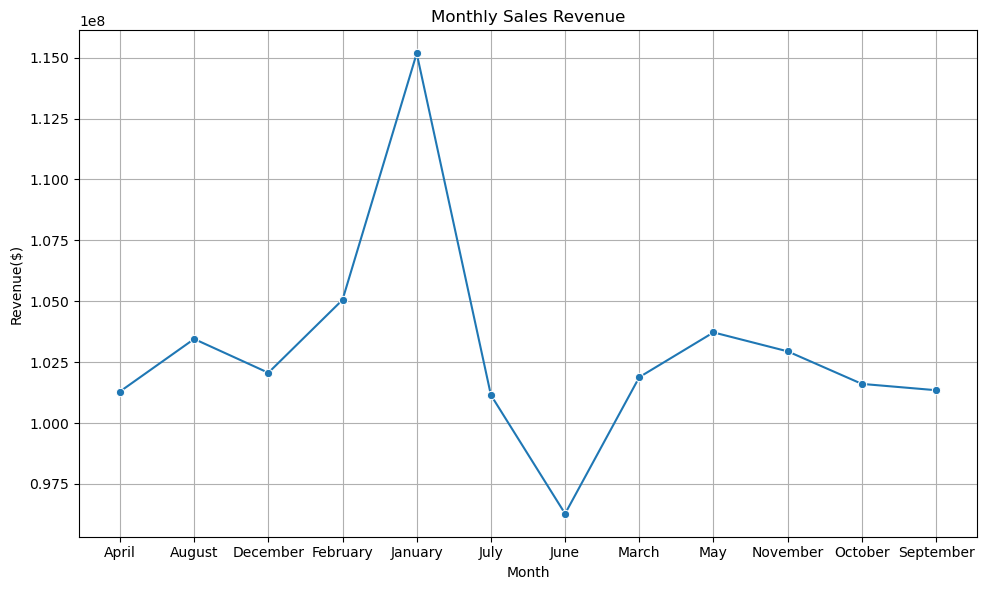

In [30]:
#data['Order_Month']=data['OrderDate'].dt.to_period('M')


monthly_sales=data.groupby('Order_Month_Name')['Revenue'].sum().reset_index()

#monthly_sales['Order_Month']=monthly_sales['Order_Month'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales,x='Order_Month_Name',y='Revenue',marker='o')
plt.title("Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue($)")
plt.grid(True)
plt.tight_layout()

plt.show()



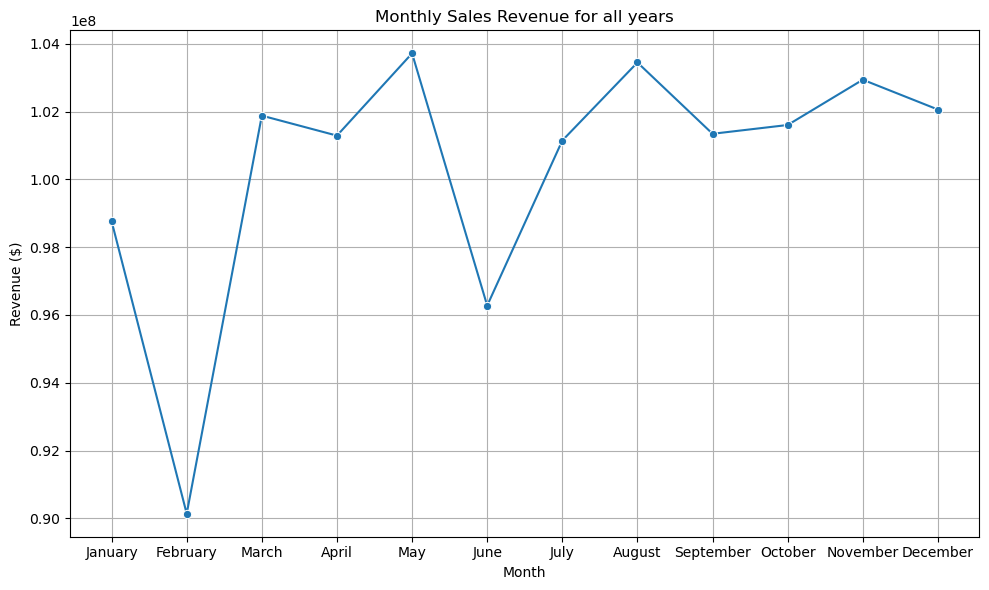

In [39]:

# Extract month name
data['Order_Month_Name'] = data['OrderDate'].dt.month_name()

data['Month_Num'] = data['OrderDate'].dt.month

monthly_sales = data.groupby(['Month_Num', 'Order_Month_Name'])['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Order_Month_Name', y='Revenue', marker='o')
plt.title("Monthly Sales Revenue for all years")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# data consist of 2018 records that why showing january at peak

In [34]:
data = data[~((data['OrderDate'].dt.year == 2018) & (data['OrderDate'].dt.month.isin([1, 2])))]

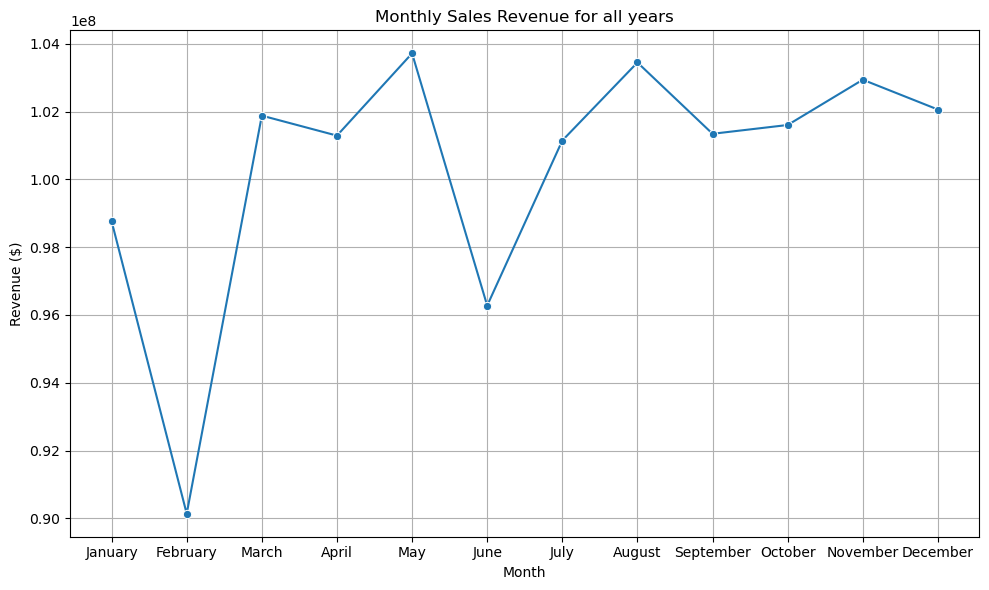

In [38]:
data['Order_Month_Name'] = data['OrderDate'].dt.month_name()

data['Month_Num'] = data['OrderDate'].dt.month

monthly_sales = data.groupby(['Month_Num', 'Order_Month_Name'])['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x='Order_Month_Name', y='Revenue', marker='o')
plt.title("Monthly Sales Revenue for all years")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\HP 6300\AppData\Local\Temp\ipykernel_2196\1647394427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Product_Name', y='Revenue' , palette='tab10')


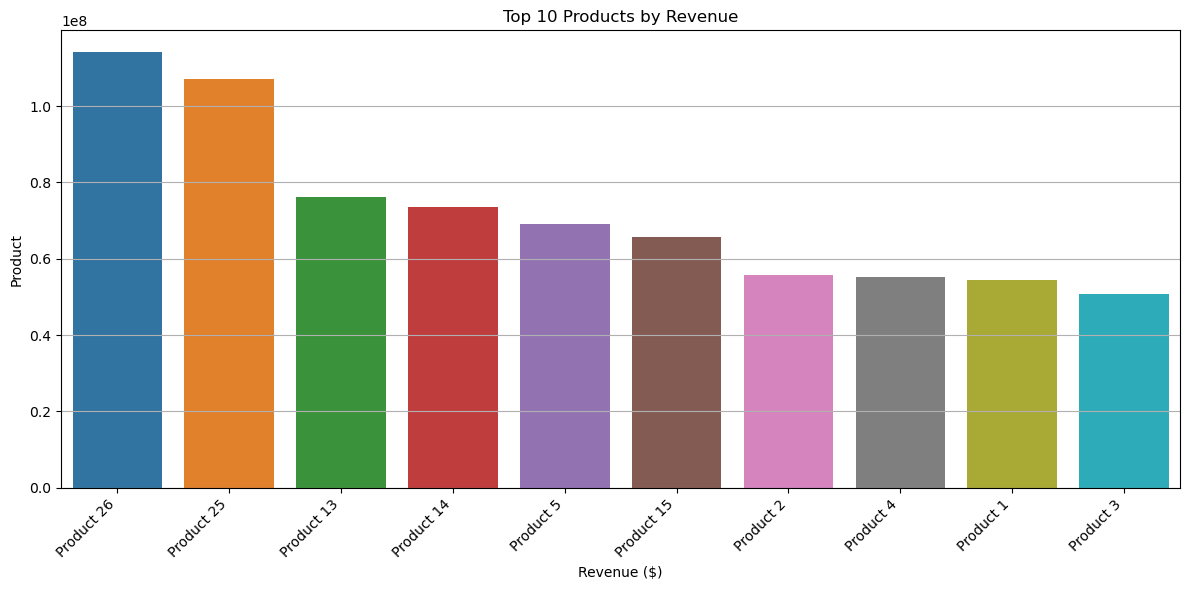

In [48]:

top_products = data.groupby('Product_Name')['Revenue'].sum().reset_index()

# Sort in descending order and select top 10
top_products = top_products.sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Product_Name', y='Revenue' , palette='tab10')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Product")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.grid(True,axis='y')
plt.show()


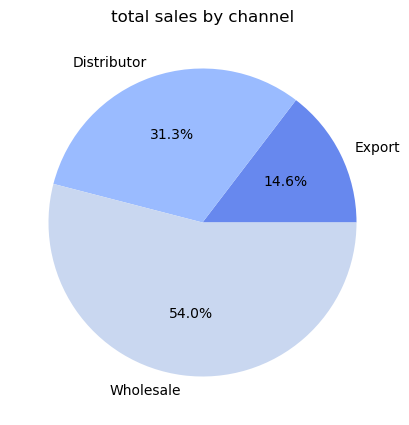

In [50]:
#sales bychannel
channel_sales=data.groupby('Channel')['Revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))
plt.pie(
        channel_sales.values,
        labels=channel_sales.index,
        autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('total sales by channel')
plt.show()

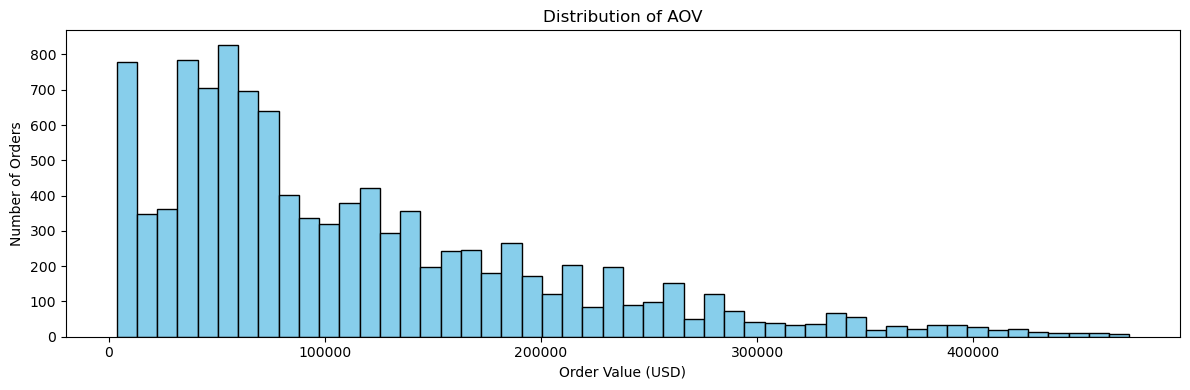

In [53]:
# average order value (AOV) distribution

aov=data.groupby('OrderNumber')['Revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
        aov,
        bins=50,
        color='skyblue',
        edgecolor='black'
)
plt.title("Distribution of AOV")
plt.xlabel("Order Value (USD)")
plt.ylabel("Number of Orders")

plt.tight_layout()

plt.show()
    

C:\Users\HP 6300\AppData\Local\Temp\ipykernel_2196\2365862168.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_top_10, x='Product_Name', y='Unit_Price',palette='tab10')


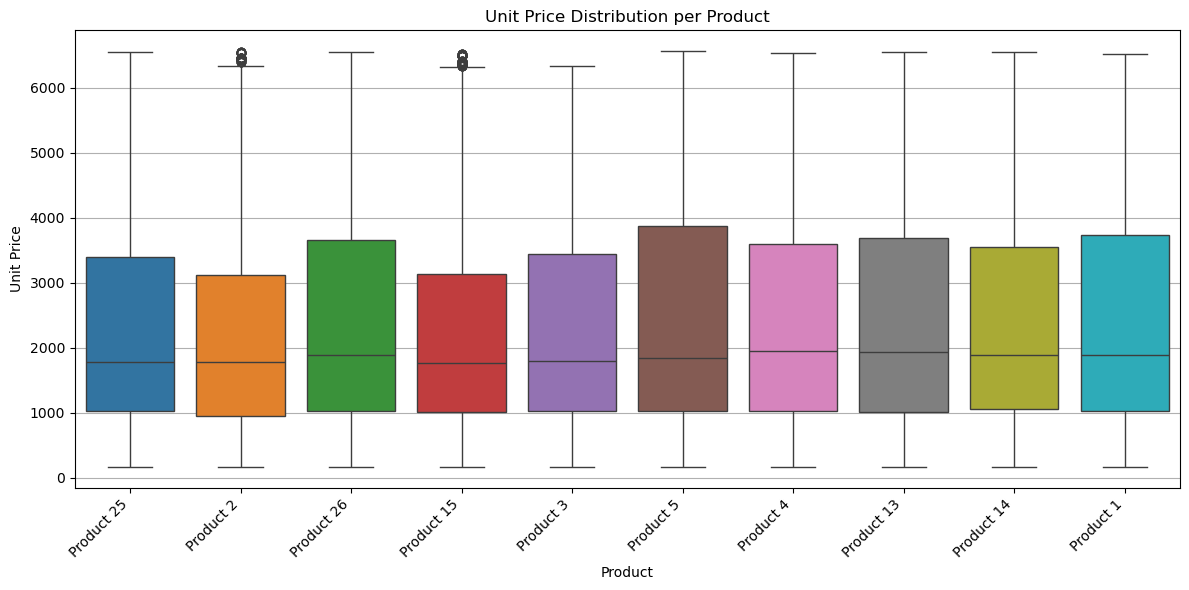

In [59]:
# unit price distribution per product
top_products = data.groupby('Product_Name')['Revenue'].sum().reset_index()

# Sort in descending order and select top 10
top_products = top_products.sort_values(by='Revenue', ascending=False).head(10)['Product_Name'].tolist()
data_top_10=data[data['Product_Name'].isin(top_products)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=data_top_10, x='Product_Name', y='Unit_Price',palette='tab10')
plt.title("Unit Price Distribution per Product")
plt.xlabel("Product")
plt.ylabel("Unit Price")
plt.xticks(rotation=45,ha='right')
plt.grid(True,axis='y')
plt.tight_layout()
plt.show()



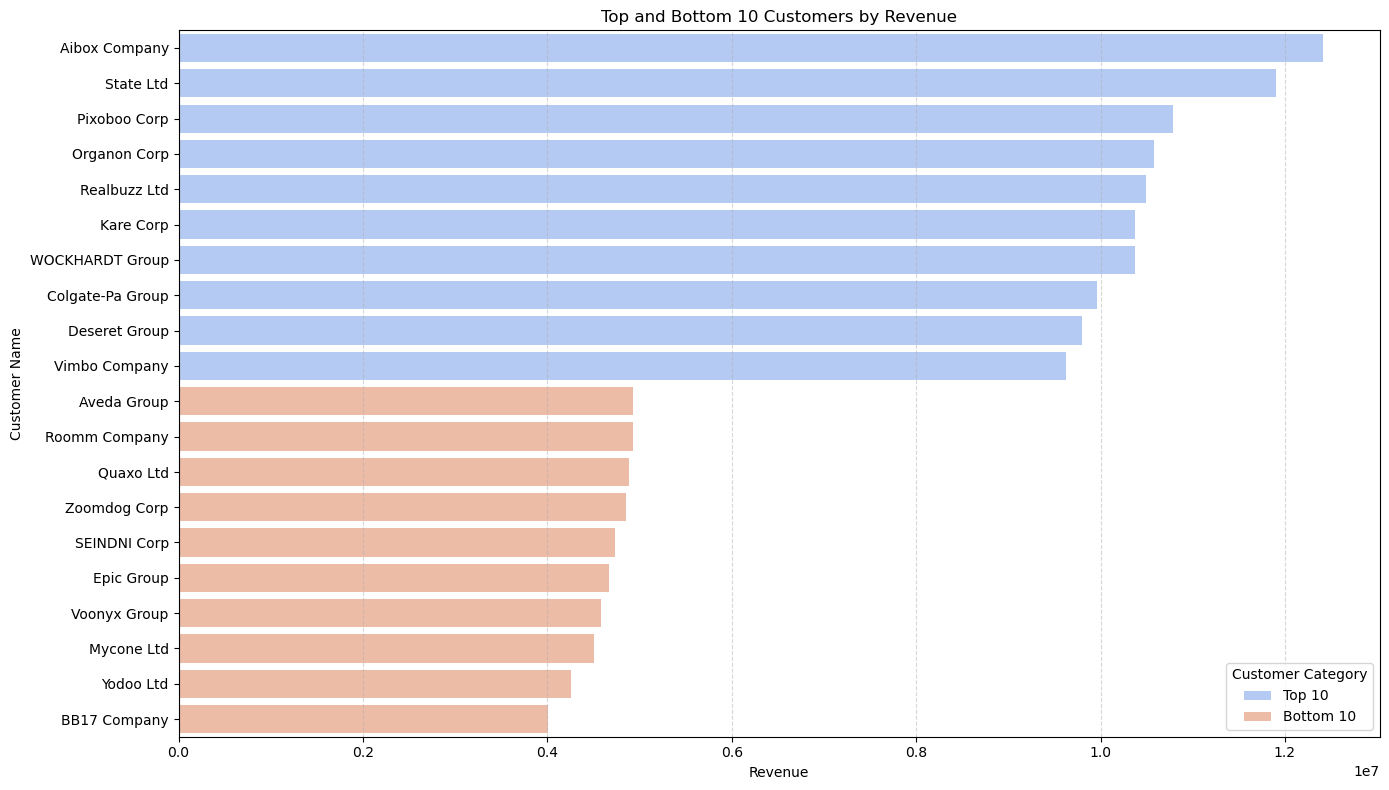

In [65]:
#top and bottom 10 customers by revenue


customer_revenue = data.groupby('Customer_Names')['Revenue'].sum().reset_index()

#Sort to get top 10 and bottom 10
top_10 = customer_revenue.sort_values(by='Revenue', ascending=False).head(10)
bottom_10 = customer_revenue.sort_values(by='Revenue', ascending=True).head(10)

#  Add a label for grouping
top_10['Category'] = 'Top 10'
bottom_10['Category'] = 'Bottom 10'

#  Combine both into one DataFrame
combined = pd.concat([top_10, bottom_10])

 #Sort by Revenue DESC to show top at top of chart
combined = combined.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=combined, x='Revenue', y='Customer_Names', hue='Category', palette='coolwarm')

plt.title("Top and Bottom 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer Name")
plt.legend(title="Customer Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


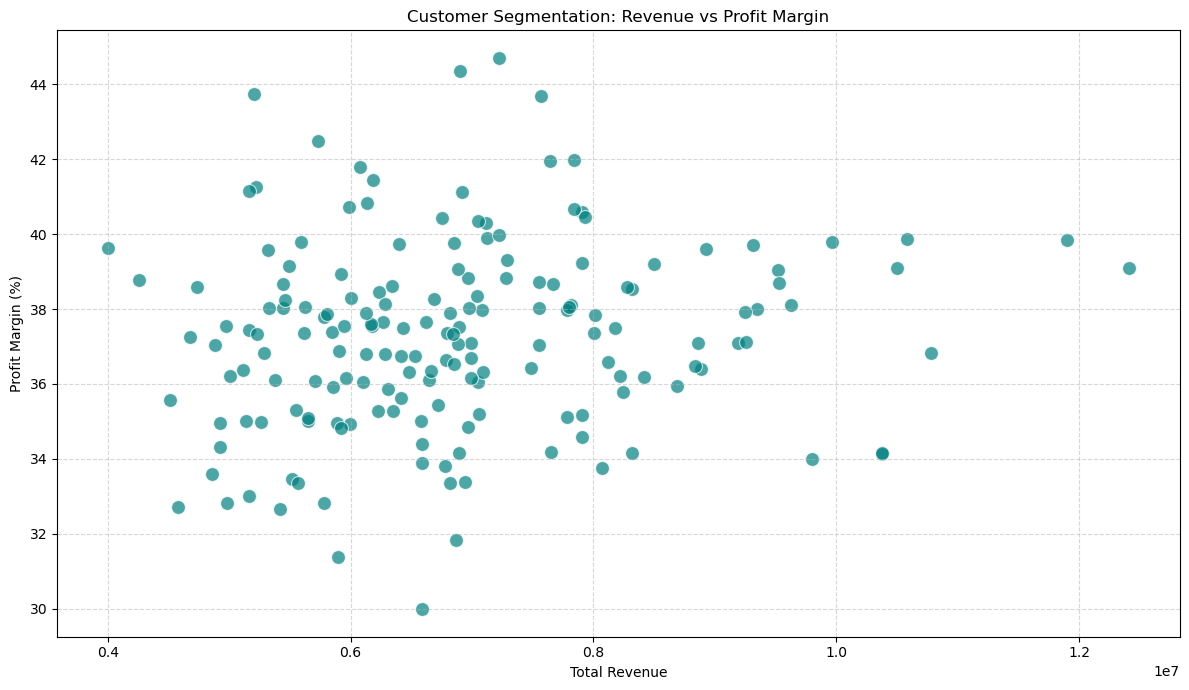

In [66]:
#customer segmentation : revenue vs profit margin 

# Group by Customer to calculate total revenue and profit
customer_summary = data.groupby('Customer_Names').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

# Calculate profit margin (%)
customer_summary['Profit_Margin'] = (customer_summary['Profit'] / customer_summary['Revenue']) * 100

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=customer_summary,
    x='Revenue',
    y='Profit_Margin',
    s=100,  # point size
    alpha=0.7,
    color='teal'
)

plt.title("Customer Segmentation: Revenue vs Profit Margin")
plt.xlabel("Total Revenue")
plt.ylabel("Profit Margin (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



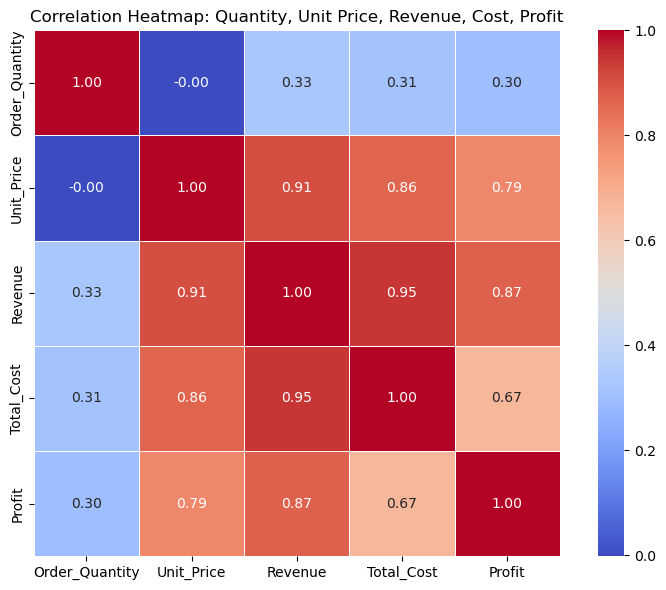

In [70]:
# correlation heatmap

#Select only the relevant numeric columns
corr_data = data[['Order_Quantity', 'Unit_Price', 'Revenue', 'Total_Cost', 'Profit']]

#  Compute the correlation matrix
corr_matrix = corr_data.corr()

#  Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

plt.title("Correlation Heatmap: Quantity, Unit Price, Revenue, Cost, Profit")
plt.tight_layout()
plt.show()


In [78]:
data.to_csv('final.csv')